<a href="https://colab.research.google.com/github/rohithv-21/Online-Vehicle-Booking/blob/main/Online_vehicle_booking_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Vehicle_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Internship(Feynn Labs)/Online Vehicle Booking/train_revised.csv')
Vehicle_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [4]:
Vehicle_df.shape

(51645, 10)

In [5]:
Vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [6]:
Vehicle_df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


In [7]:
Vehicle_df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [8]:
Vehicle_df.head(3)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49


In [9]:
Vehicle_df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [10]:
Vehicle_df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [11]:
len(Vehicle_df['ride_id'].unique())

6249

In [12]:
Vehicle_df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

#Finding Our Target Variable

In [13]:
ride_id_dic = {}
for ride_id in Vehicle_df["ride_id"]:
    if not ride_id in ride_id_dic:
        ride_id_dic["ride_id"] = 1
    else:
        ride_id_dic["ride_id"] += 1

for i in range(len(Vehicle_df)):
    ride_id = Vehicle_df.loc[i]["ride_id"]
    Vehicle_df.at[i,"number_of_tickets"] = ride_id_dic["ride_id"]


In [14]:
Vehicle_df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,1.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,1.0
...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49,1.0
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49,1.0
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49,1.0
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49,1.0


Now we found our target variable so let us delete the duplicate values from ride_id

In [15]:
Vehicle_df=Vehicle_df.drop_duplicates("ride_id")

In [16]:
Vehicle_df.shape

(6249, 11)

Now let us merge two datasets on ride_id key to make the final dataset where we have dependent as well as independent variables too.

Now we have found our final dataset so let us remove some features that doesn't seem to be important for predicting the number of tickets in our model

In [17]:
Vehicle_df = Vehicle_df.drop(['seat_number','payment_method','payment_receipt'], axis=1)

#Removing Constant Features


We need to first remove the constant features.



In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
Vehicle_df.drop(["travel_to"],axis=1,inplace=True)

#Feature Engineering

In [20]:
#concatenate travel date and travel time column and make a new feature called date.
Vehicle_df["date"]=Vehicle_df["travel_date"]+ " "+Vehicle_df["travel_time"]

In [21]:
def  time_features(df): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df


In [22]:
Vehicle_df1 = time_features(Vehicle_df)
Vehicle_df1.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1.0,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1.0,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1.0,2017-11-26 07:05:00,6,330,26,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,1.0,2017-11-27 07:10:00,0,331,27,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,1.0,2017-11-27 07:12:00,0,331,27,7,12,0,2017,4,11


In [23]:
Vehicle_df1["travel_time"] = Vehicle_df1["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [24]:
Vehicle_df1['period'] = np.nan
Vehicle_df1.loc[Vehicle_df1.travel_time < 7, 'period'] = 'em'
Vehicle_df1.loc[(Vehicle_df1.travel_time >= 7) & (Vehicle_df1.travel_time < 11), 'period'] = 'am'
Vehicle_df1.loc[(Vehicle_df1.travel_time >= 11) & (Vehicle_df1.travel_time < 15), 'period'] = 'mid'
Vehicle_df1.loc[(Vehicle_df1.travel_time >= 15) & (Vehicle_df1.travel_time < 19), 'period'] = 'eve'
Vehicle_df1.loc[(Vehicle_df1.travel_time >= 19) & (Vehicle_df1.travel_time <= 24), 'period'] = 'pm'

pcount = dict(Vehicle_df1['period'].value_counts())
pcount

Vehicle_df1['hourly_travelers'] = np.log1p(Vehicle_df1['period'].map(pcount))

dcount = dict(Vehicle_df1["day_of_year"].value_counts())
Vehicle_df1["daily_travelers"] = np.log1p(Vehicle_df1["day_of_year"].map(dcount))
Vehicle_df1.head()


,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1.0,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1.0,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1.0,2017-11-26 07:05:00,6,330,26,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,1.0,2017-11-27 07:10:00,0,331,27,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,1.0,2017-11-27 07:12:00,0,331,27,7,12,0,2017,4,11,am,8.494743,3.871201


In [25]:
Vehicle_df1.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_tickets', 'date', 'day_of_week',
       'day_of_year', 'day_of_month', 'hour', 'minute', 'is_weekend', 'year',
       'quarter', 'month', 'period', 'hourly_travelers', 'daily_travelers'],
      dtype='object')

In [26]:
new_cols = ['day_of_year','daily_travelers','minute','day_of_month','hourly_travelers','is_weekend','day_of_week']

In [27]:
vehicle_dataset=Vehicle_df1.copy()
vehicle_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1.0,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1.0,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1.0,2017-11-26 07:05:00,6,330,26,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,1.0,2017-11-27 07:10:00,0,331,27,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,1.0,2017-11-27 07:12:00,0,331,27,7,12,0,2017,4,11,am,8.494743,3.871201


In [28]:
vehicle_dataset.shape

(6249, 20)

In [29]:
vehicle_dataset.month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: month, dtype: int64

In [30]:
dict_cov = {12:1, 2:1, 1:1, 2:1, 4:2, 11:2, 9:3, 7:3, 8:3, 10:3, 6:3, 5:3}
vehicle_dataset['month'].replace(dict_cov,inplace=True)

In [31]:
vehicle_dataset.month.value_counts()

1    2931
3    2304
2    1014
Name: month, dtype: int64

In [32]:
vehicle_dataset.day_of_month.unique()


array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13,  4, 28, 31, 30, 29, 25, 24,
       23, 22, 21, 12,  3,  2,  1])

In [33]:
conv_dict = {17:2, 19:2, 26:3, 27:3, 20:2, 18:2, 16:2, 15:2, 14:2, 13:2,  4:1, 28:2, 31:3, 30:3, 29:3, 25:3, 24:3,
       23:3, 22:3, 21:3, 12:1,  3:1,  2:1,  1:2}
vehicle_dataset['day_of_month'].replace(conv_dict,inplace=True)


In [34]:
vehicle_dataset['day_of_month'].value_counts()


1    2496
2    2305
3    1448
Name: day_of_month, dtype: int64

In [35]:
vehicle_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1.0,2017-10-17 07:15:00,1,290,2,7,15,0,2017,4,3,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1.0,2017-11-19 07:12:00,6,323,2,7,12,1,2017,4,2,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1.0,2017-11-26 07:05:00,6,330,3,7,5,1,2017,4,2,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,1.0,2017-11-27 07:10:00,0,331,3,7,10,0,2017,4,2,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,1.0,2017-11-27 07:12:00,0,331,3,7,12,0,2017,4,2,am,8.494743,3.871201


In [36]:
# Let us find the difference between next and previous buses

def find_difference_between_bus(data):
  
  data.sort_values(["travel_from","date"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date.shift(-1)-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus","Time_gap_btw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")

  return data

In [37]:
data = find_difference_between_bus(vehicle_dataset)
data

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,...,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus
2152,6654,05-12-17,7.133333,Awendo,Bus,49,1.0,2017-05-12 07:08:00,4,132,...,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667
44611,12926,01-04-18,7.133333,Awendo,Bus,49,1.0,2018-01-04 07:08:00,3,4,...,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667
44617,12929,01-04-18,7.200000,Awendo,Bus,49,1.0,2018-01-04 07:12:00,3,4,...,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333
44650,12935,01-04-18,7.216667,Awendo,Bus,49,1.0,2018-01-04 07:13:00,3,4,...,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000
44609,12924,01-04-18,8.000000,Awendo,Bus,49,1.0,2018-01-04 08:00:00,3,4,...,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47649,13299,10-04-18,7.083333,Sori,Bus,49,1.0,2018-10-04 07:05:00,3,277,...,am,8.494743,3.891820,-744.000000,720.000000,-760.083333,4015.916667,-1464.000000,4032.000000,1464.000000
48048,13351,11-04-18,7.083333,Sori,Bus,49,1.0,2018-11-04 07:05:00,6,308,...,am,8.494743,3.970292,-16.083333,744.000000,-720.000000,1464.000000,-736.083333,4759.916667,760.083333
47716,13309,11-04-18,23.166667,Sori,Bus,49,1.0,2018-11-04 23:10:00,6,308,...,pm,5.659482,3.970292,-703.916667,16.083333,-720.000000,760.083333,-736.083333,1480.083333,720.000000
48412,13408,12-04-18,7.083333,Sori,Bus,49,1.0,2018-12-04 07:05:00,1,338,...,am,8.494743,3.951244,-16.083333,703.916667,-720.000000,720.000000,-736.083333,1464.000000,720.000000


We see that there are some null values present in the dataset so let us remove those null values

In [38]:
data.dropna(inplace=True)

In [39]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,...,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus
2152,6654,05-12-17,7.133333,Awendo,Bus,49,1.0,2017-05-12 07:08:00,4,132,...,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667
44611,12926,01-04-18,7.133333,Awendo,Bus,49,1.0,2018-01-04 07:08:00,3,4,...,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667
44617,12929,01-04-18,7.200000,Awendo,Bus,49,1.0,2018-01-04 07:12:00,3,4,...,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333
44650,12935,01-04-18,7.216667,Awendo,Bus,49,1.0,2018-01-04 07:13:00,3,4,...,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000
44609,12924,01-04-18,8.000000,Awendo,Bus,49,1.0,2018-01-04 08:00:00,3,4,...,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667


In [40]:
from datetime import datetime
from datetime import timedelta


In [41]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,...,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus
2152,6654,05-12-17,7.133333,Awendo,Bus,49,1.0,2017-05-12 07:08:00,4,132,...,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667
44611,12926,01-04-18,7.133333,Awendo,Bus,49,1.0,2018-01-04 07:08:00,3,4,...,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667
44617,12929,01-04-18,7.200000,Awendo,Bus,49,1.0,2018-01-04 07:12:00,3,4,...,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333
44650,12935,01-04-18,7.216667,Awendo,Bus,49,1.0,2018-01-04 07:13:00,3,4,...,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000
44609,12924,01-04-18,8.000000,Awendo,Bus,49,1.0,2018-01-04 08:00:00,3,4,...,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667


Now let us find the distance of each origin point from the destination point. I used Nairobi Map to estimate the distance from origin point to destination map.

In [42]:
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
data["travel_from_distance"]=data.travel_from.map(distance)


In [43]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
data["travel_from_time"]=data.travel_from.map(time)


In [44]:
data["Speed"]=data.travel_from_time/data.travel_from_distance


In [45]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
for key in time.keys(): 
    time[key]=timedelta( minutes=time[key])

#find the date of traveling from origin 
data["Date_of_traveling_from_origin"]=data.travel_from.map(time)

# find the date of arrival at distination
data["arrival_date"]=data.date+ data.Date_of_traveling_from_origin
data["hod_arrived_date"]=data["arrival_date"].dt.hour
data["minute_arrived_date"]=data["arrival_date"].dt.minute
del data["Date_of_traveling_from_origin"],data["arrival_date"]


#Encoding Categorical features


In [46]:
data = pd.get_dummies(data, columns=['travel_from','day_of_month','month'])
label_enc = {'Bus':1,'shuttle':0}
data.replace(label_enc,inplace=True)


In [47]:
data.head()


,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_tickets,date,day_of_week,day_of_year,hour,...,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
2152,6654,05-12-17,7.133333,1,49,1.0,2017-05-12 07:08:00,4,132,7,...,0,0,0,0,1,0,0,0,0,1
44611,12926,01-04-18,7.133333,1,49,1.0,2018-01-04 07:08:00,3,4,7,...,0,0,0,0,1,0,0,1,0,0
44617,12929,01-04-18,7.200000,1,49,1.0,2018-01-04 07:12:00,3,4,7,...,0,0,0,0,1,0,0,1,0,0
44650,12935,01-04-18,7.216667,1,49,1.0,2018-01-04 07:13:00,3,4,7,...,0,0,0,0,1,0,0,1,0,0
44609,12924,01-04-18,8.000000,1,49,1.0,2018-01-04 08:00:00,3,4,8,...,0,0,0,0,1,0,0,1,0,0


In [48]:
data = data.drop(['date','travel_date','period'], axis=1)

#K-Means

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6246 entries, 2152 to 48114
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ride_id                         6246 non-null   int64  
 1   travel_time                     6246 non-null   float64
 2   car_type                        6246 non-null   int64  
 3   max_capacity                    6246 non-null   int64  
 4   number_of_tickets               6246 non-null   float64
 5   day_of_week                     6246 non-null   int64  
 6   day_of_year                     6246 non-null   int64  
 7   hour                            6246 non-null   int64  
 8   minute                          6246 non-null   int64  
 9   is_weekend                      6246 non-null   int64  
 10  year                            6246 non-null   int64  
 11  quarter                         6246 non-null   int64  
 12  hourly_travelers              

In [50]:
X = data.iloc[:,[0,4,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]].values

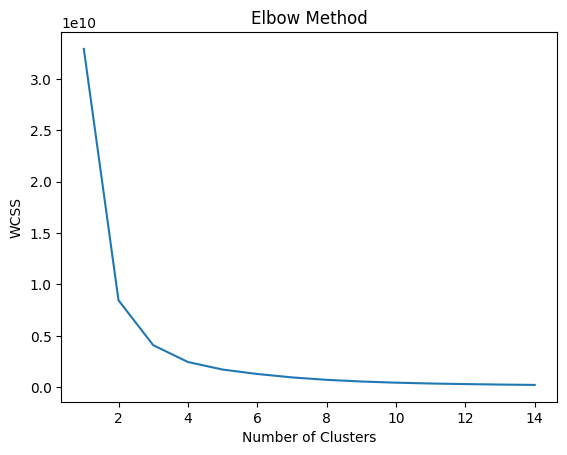

In [51]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
#Fit the k-means algorithm to the Vehicle_df
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

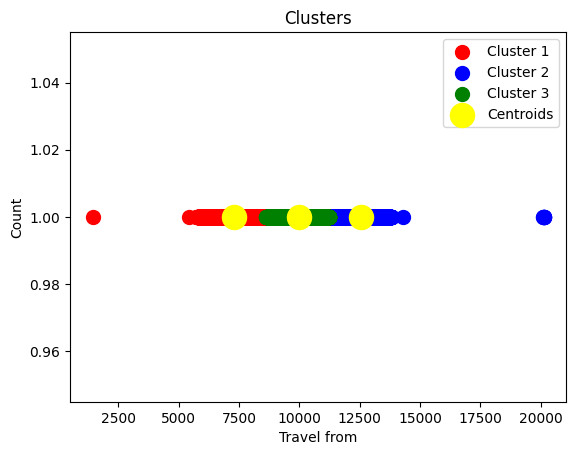

In [53]:
#Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters')
plt.xlabel('Travel from')
plt.ylabel('Count')
plt.legend()
plt.show()

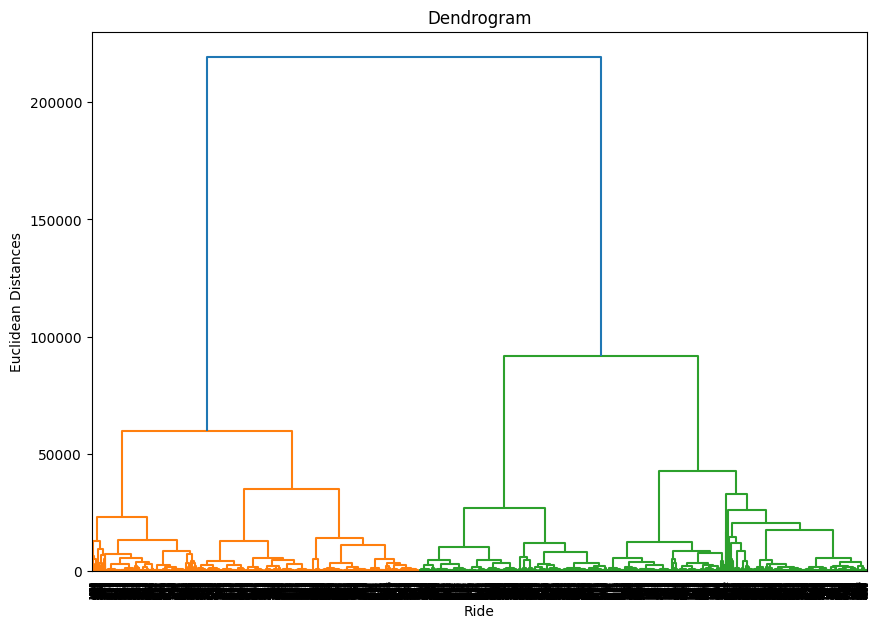

In [54]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Ride')
plt.ylabel('Euclidean Distances')
plt.show()